## Classification of cancer dignosis

In [21]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Dataset

In [23]:
dataset = pd.read_csv('/content/drive/MyDrive/cancer.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Dropping 'id' & 'unnamed' columns from the dataset

In [25]:
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
ColumnsToDrop = ['id']
dataset.drop(ColumnsToDrop,axis=1, inplace = True)
dataset.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Visualization of data

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

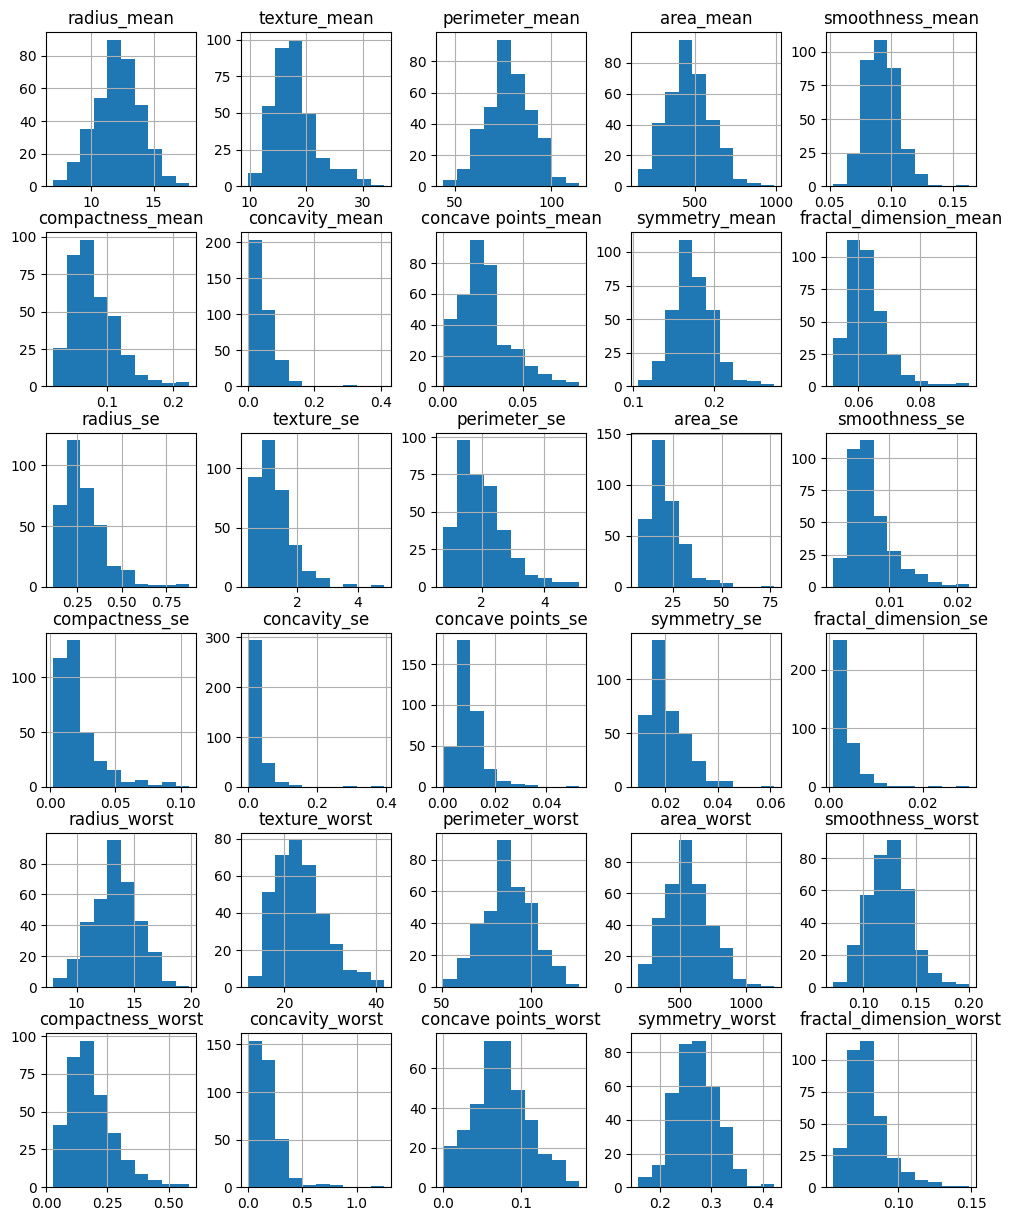

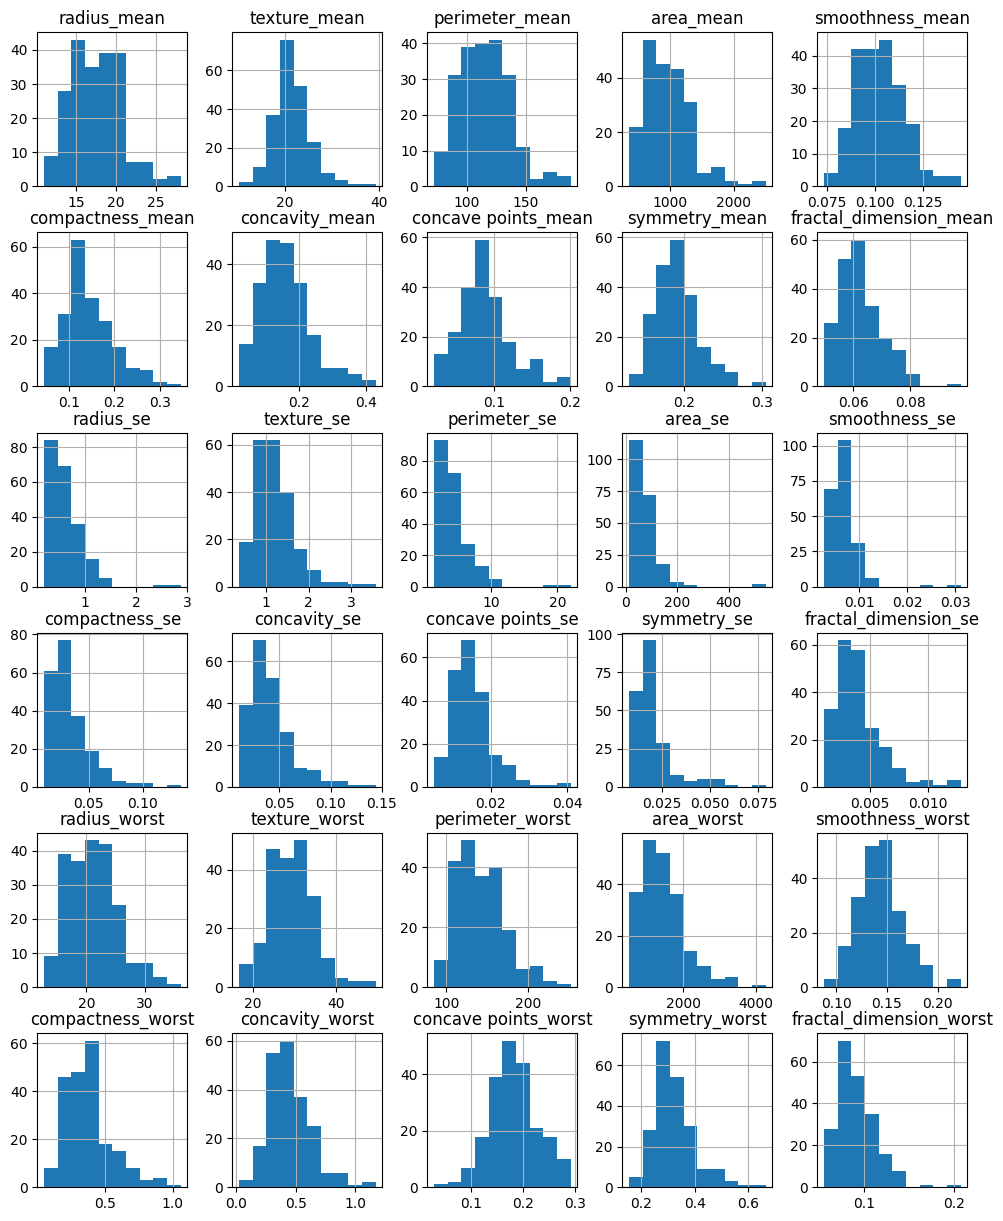

In [26]:
dataset.groupby('diagnosis').hist(figsize=(12, 15))

dataset.isnull().sum()
dataset.isna().sum()

### Label encoder to encode object type columns.

In [27]:


def Encoder(dataset):
    le = LabelEncoder()
    columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
    for feature in columnsToEncode:
      try:
          dataset[feature] = le.fit_transform(dataset[feature])
      except:
          print('Error encoding '+feature)
    return dataset

In [28]:
dataset = Encoder(dataset)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Assigning 25% of dataset to test set

In [29]:
train_set, test_set=train_test_split(dataset,test_size=0.25,random_state=42)

In [30]:
# features and labels of train dataset
trainingCols = train_set.drop(['diagnosis'], axis=1)
trainingLabels = train_set['diagnosis']

In [31]:
#features and labels of test dataset
test_x_cols=(test_set.drop(['diagnosis'],axis=1)).columns.values
test_y_cols='diagnosis'
X_test=test_set.loc[:,test_x_cols]
Y_test=test_set.loc[:,test_y_cols]

In [32]:
print('shape of train dataset features:',trainingCols.shape)
print('shape of train dataset labels:',trainingLabels.shape)
print('shape of test dataset features:', X_test.shape)
print('shape of test dataset labels:',Y_test.shape)

shape of train dataset features: (426, 30)
shape of train dataset labels: (426,)
shape of test dataset features: (143, 30)
shape of test dataset labels: (143,)


In [33]:
print("Cancer data set dimensions : {}".format(dataset.shape))

dataset.groupby('diagnosis').size()

Cancer data set dimensions : (569, 31)


diagnosis
0    357
1    212
dtype: int64

## classifier training, predict, confusion matrix, ROC curve  function:

In [34]:
def classify(classifier, classifier_name):
    classifier = Train(classifier)
    y_pred = Predict(classifier, classifier_name)
    cnf_plot(Confusion_matrix(classifier, y_pred), classifier_name)

def Train(classifier):
    classifier.fit(trainingCols,trainingLabels)
    return classifier

def Predict(classifier, classifier_name):
    y_pred = classifier.predict(X_test)
    print(classifier_name + " Accuracy:",metrics.accuracy_score(Y_test, y_pred))
    print(classifier_name+ " Precision:",metrics.precision_score(Y_test, y_pred))
    print(classifier_name + " Recall:",metrics.recall_score(Y_test, y_pred))
    return y_pred

def Confusion_matrix(classifier, y_pred):
    cnf = metrics.confusion_matrix(Y_test, y_pred)
    return cnf

def cnf_plot(cnf_matrix, classifier_name):
    %matplotlib inline
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(classifier_name + 'confusion matrix: ', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

def pred_prob(classifier, classifier_name):
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(Y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.title(classifier_name+ ' - ROC curve: ', y=1.1)
    plt.legend(loc=4)
    plt.show()

## DesicionTree

DesicionTree Accuracy: 0.951048951048951
DesicionTree Precision: 0.9272727272727272
DesicionTree Recall: 0.9444444444444444
None


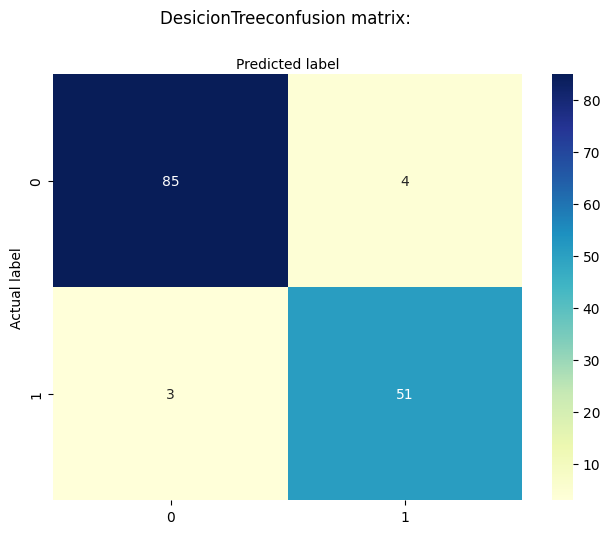

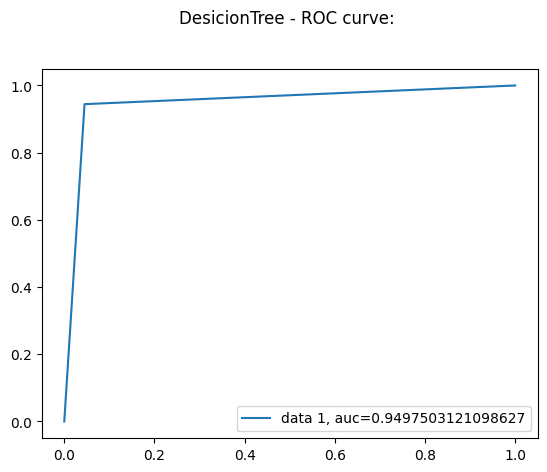

In [35]:
dec_clf = DecisionTreeClassifier(random_state=42)
trained_clf = classify(dec_clf, 'DesicionTree')
print(trained_clf)
pred_prob(dec_clf, 'DesicionTree')

- #### DecisionTreeClassifier criterion = 'entropy'

DesicionTree Entropy Accuracy: 0.958041958041958
DesicionTree Entropy Precision: 0.9615384615384616
DesicionTree Entropy Recall: 0.9259259259259259
None


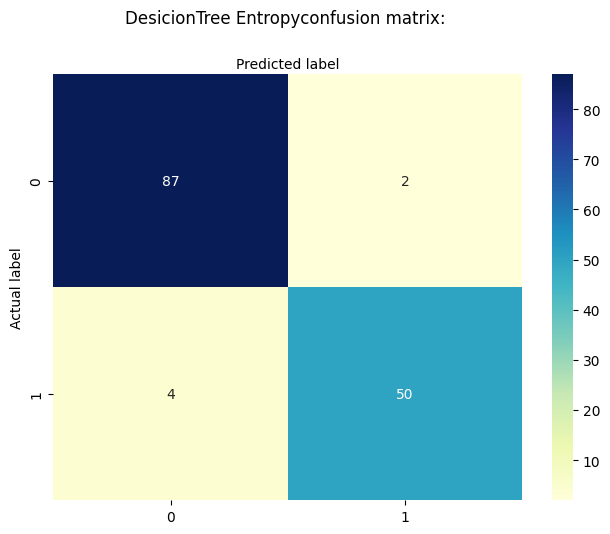

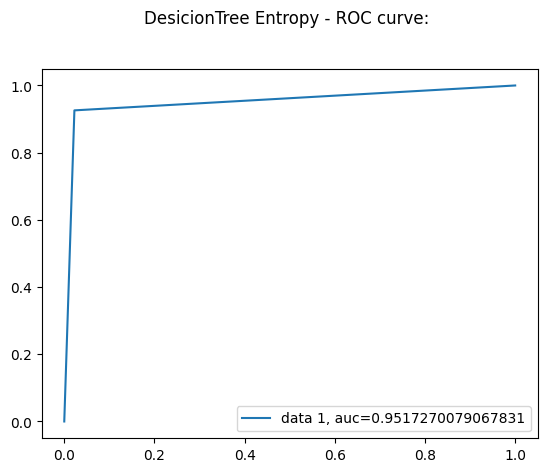

In [36]:
destree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
trained_clf = classify(destree, 'DesicionTree Entropy')
print(trained_clf)
pred_prob(destree, 'DesicionTree Entropy')

## SVM classifier

- #### SVM Linear

SVM_linear  Accuracy: 0.958041958041958
SVM_linear  Precision: 0.9615384615384616
SVM_linear  Recall: 0.9259259259259259


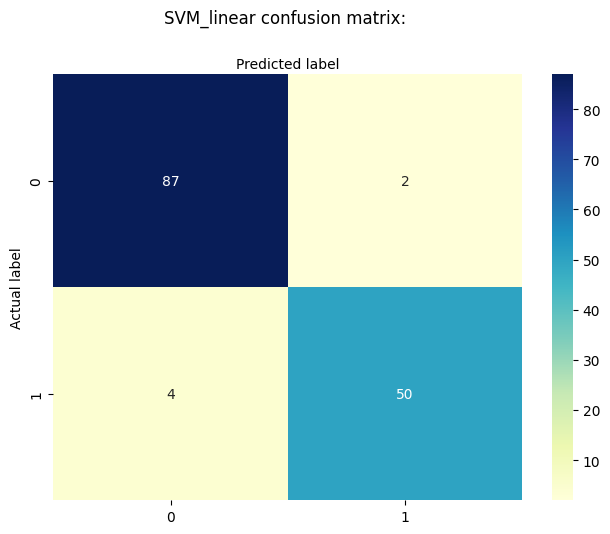

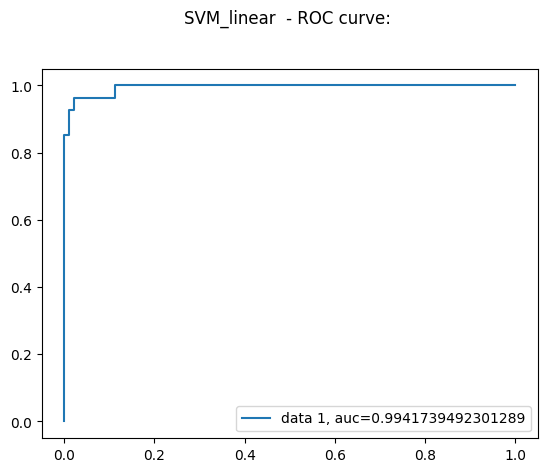

In [37]:
svm_lin = SVC(kernel = 'linear', random_state = 0, probability=True)
trained_clf = classify(svm_lin, 'SVM_linear ')
pred_prob(svm_lin, 'SVM_linear ')

- #### SVM Linear gamma auto

SVM_linear_gamma_auto  Accuracy: 0.958041958041958
SVM_linear_gamma_auto  Precision: 0.9615384615384616
SVM_linear_gamma_auto  Recall: 0.9259259259259259


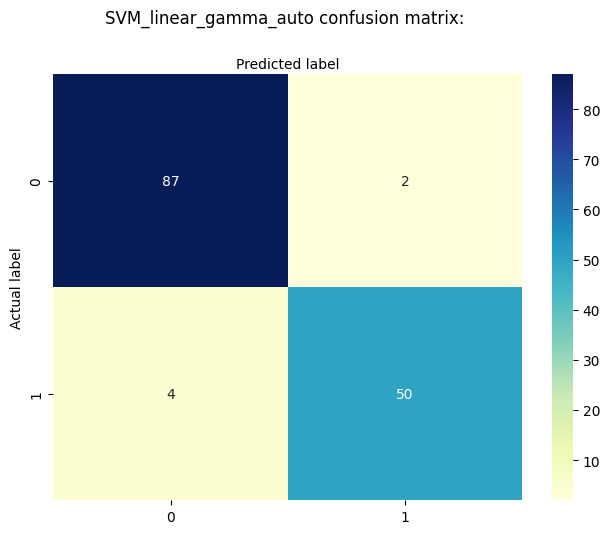

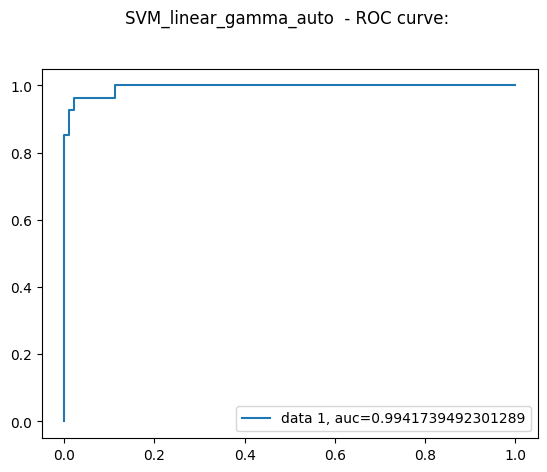

In [38]:
svm_clf=SVC(kernel='linear',gamma="auto",random_state=0, probability=True)
trained_clf = classify(svm_clf, 'SVM_linear_gamma_auto ')
pred_prob(svm_clf, 'SVM_linear_gamma_auto ')

- #### SVM rbc

SVM_rbc Accuracy: 0.951048951048951
SVM_rbc Precision: 0.9795918367346939
SVM_rbc Recall: 0.8888888888888888


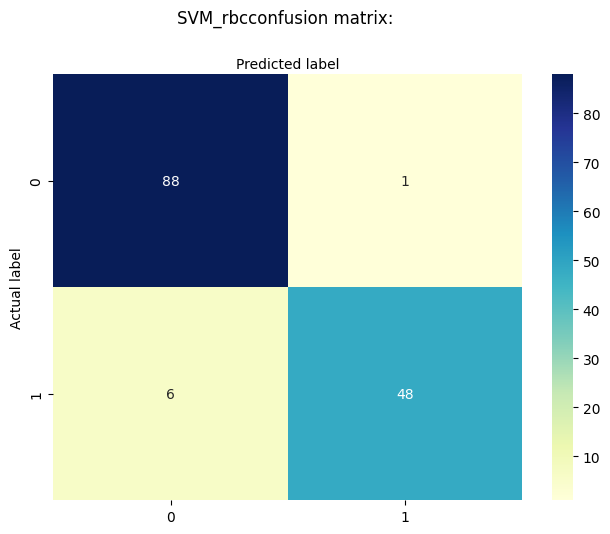

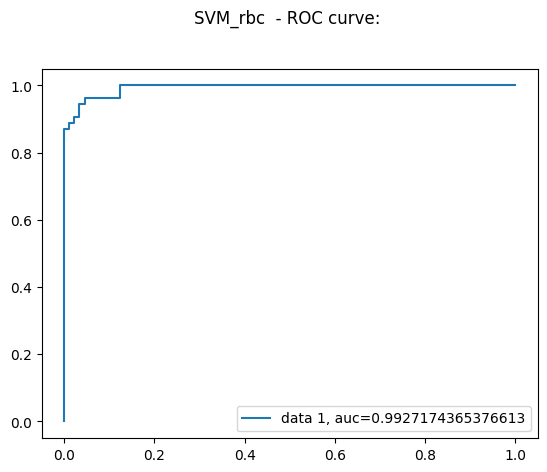

In [39]:
svm_rbc = SVC(kernel = 'rbf', random_state = 0, probability=True )
trained_clf = classify(svm_rbc, 'SVM_rbc')
pred_prob(svm_rbc, 'SVM_rbc ')

## Random Forest

RandomForest Accuracy: 0.965034965034965
RandomForest Precision: 0.9622641509433962
RandomForest Recall: 0.9444444444444444
None


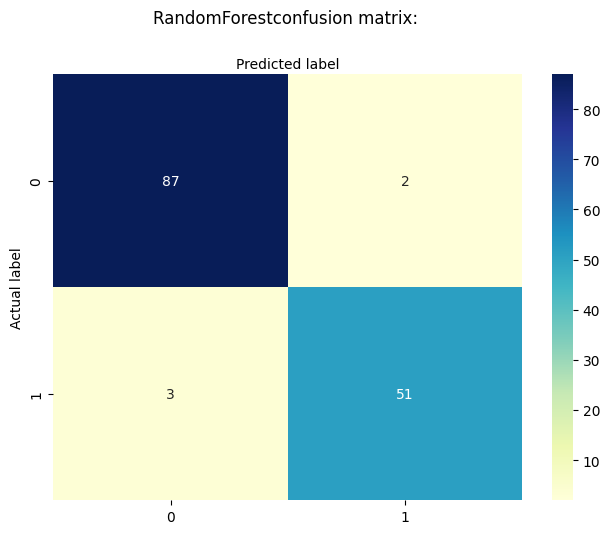

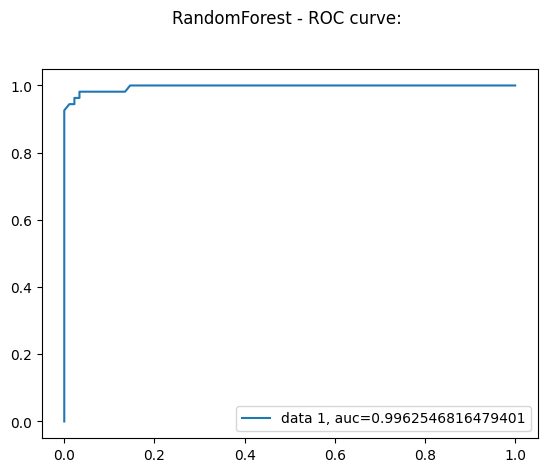

In [40]:
forest_clf=RandomForestClassifier(random_state=42)
trained_clf = classify(forest_clf, 'RandomForest')
print(trained_clf)
pred_prob(forest_clf, 'RandomForest')

- #### RandomForestClassifier n_estimators = 10, criterion = 'entropy'

RandomForest_Entropy  Accuracy: 0.972027972027972
RandomForest_Entropy  Precision: 0.9807692307692307
RandomForest_Entropy  Recall: 0.9444444444444444
None


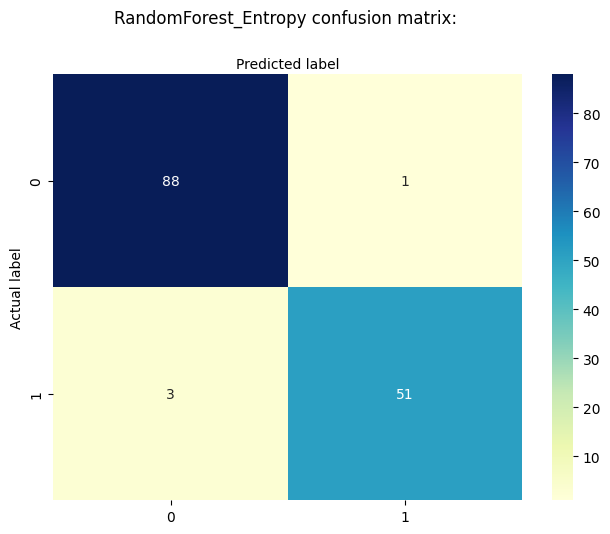

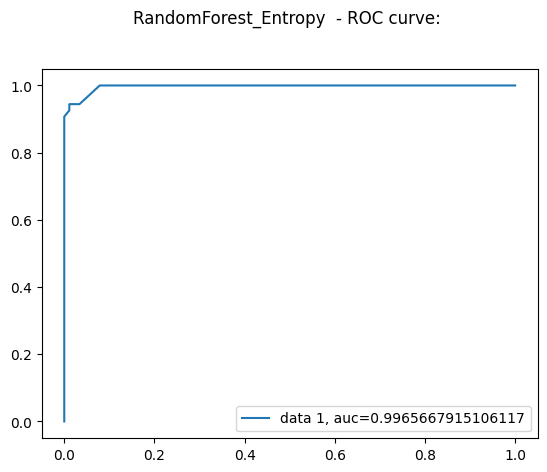

In [41]:
RF_Entr = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
trained_clf = classify(RF_Entr, 'RandomForest_Entropy ')
print(trained_clf)
pred_prob(RF_Entr, 'RandomForest_Entropy ')

## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression :  Accuracy: 0.965034965034965
LogisticRegression :  Precision: 0.9622641509433962
LogisticRegression :  Recall: 0.9444444444444444
None


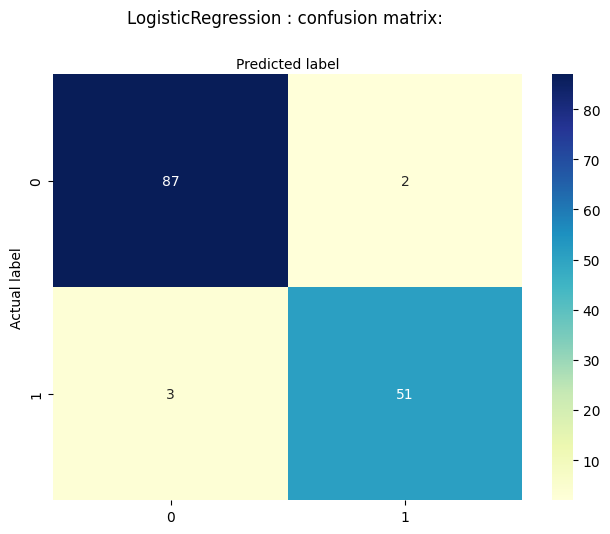

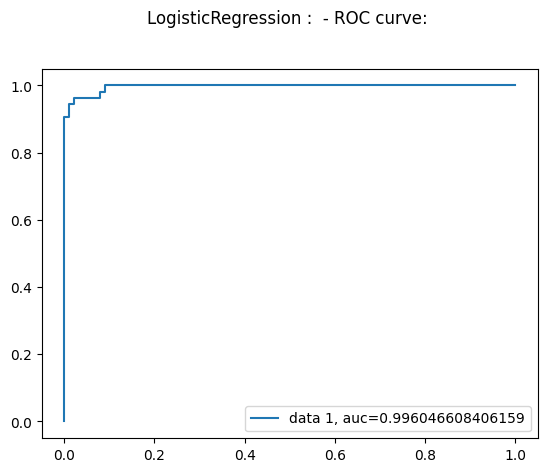

In [42]:
log_clf = LogisticRegression(random_state = 0)
trained_clf = classify(log_clf, 'LogisticRegression : ')
print(trained_clf)
pred_prob(log_clf, 'LogisticRegression : ')

#### Logistic Regression max_iter=200

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_iter200 :  Accuracy: 0.965034965034965
LogisticRegression_iter200 :  Precision: 0.9622641509433962
LogisticRegression_iter200 :  Recall: 0.9444444444444444
None


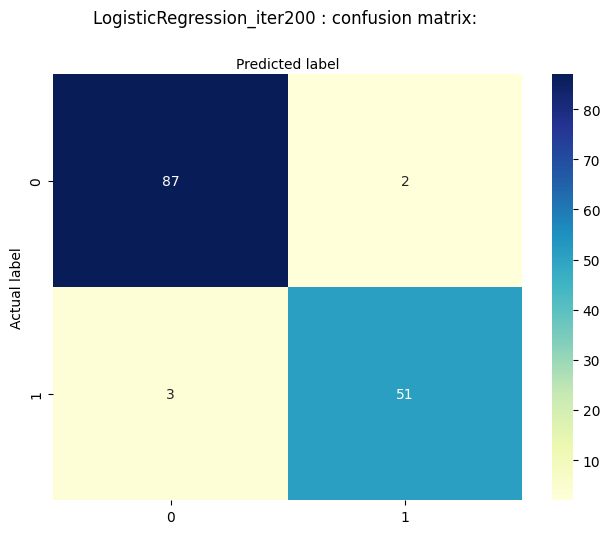

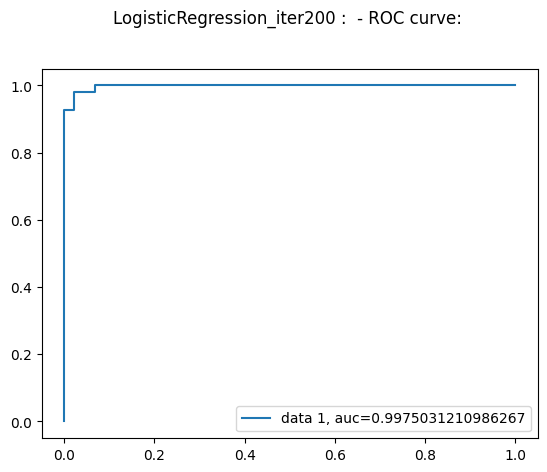

In [43]:
log_clf_1 = LogisticRegression(random_state = 0, max_iter=200)
trained_clf = classify(log_clf_1, 'LogisticRegression_iter200 : ')
print(trained_clf)
pred_prob(log_clf_1, 'LogisticRegression_iter200 : ')

## KNN

- #### KNN neighbours = 5

KNN 5 neighbours :  Accuracy: 0.965034965034965
KNN 5 neighbours :  Precision: 0.9803921568627451
KNN 5 neighbours :  Recall: 0.9259259259259259
None


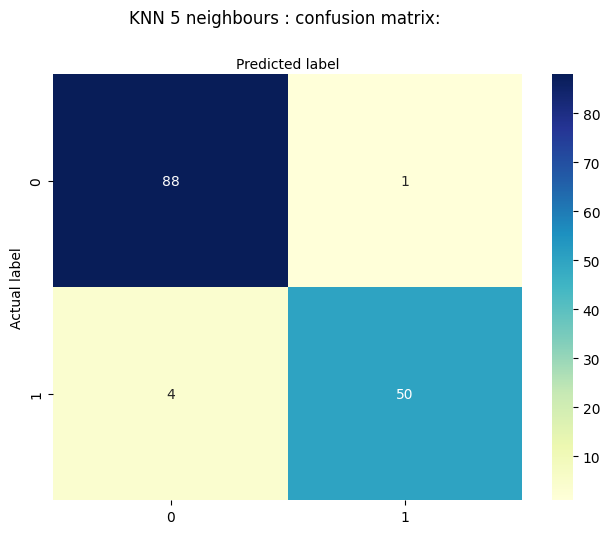

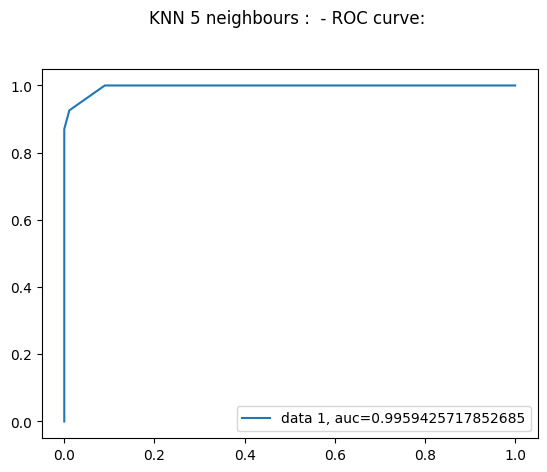

In [44]:
knn_5 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
trained_clf = classify(knn_5, 'KNN 5 neighbours : ')
print(trained_clf)
pred_prob(knn_5, 'KNN 5 neighbours : ')

## Naive Bayes

GaussianNB :  Accuracy: 0.958041958041958
GaussianNB :  Precision: 0.9444444444444444
GaussianNB :  Recall: 0.9444444444444444
None


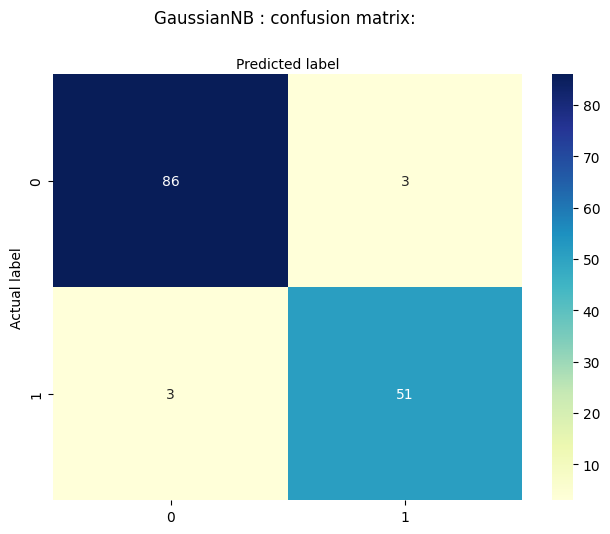

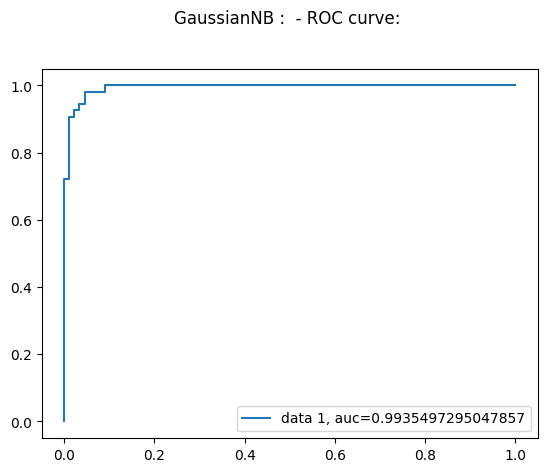

In [45]:
gauss_nb = GaussianNB()
trained_clf = classify(gauss_nb, 'GaussianNB : ')
print(trained_clf)
pred_prob(gauss_nb, 'GaussianNB : ')

## DNN classifier:

In [46]:
#importing libraries:

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers


## Build a DNN model to classify.

In [47]:
# Building a model:
model = Sequential([
    Dense(128, activation='relu', input_shape=(30,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# fit model
history = model.fit(trainingCols,trainingLabels, validation_data=(X_test, Y_test), epochs=200)

Epoch 1/200
14/14 [==============================] - 1s 22ms/step - loss: 12.2733 - accuracy: 0.5986 - val_loss: 2.4626 - val_accuracy: 0.6434
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 2.8983 - accuracy: 0.7559 - val_loss: 0.6906 - val_accuracy: 0.9301
Epoch 3/200
14/14 [==============================] - 0s 6ms/step - loss: 2.0464 - accuracy: 0.8239 - val_loss: 0.9199 - val_accuracy: 0.9301
Epoch 4/200
14/14 [==============================] - 0s 6ms/step - loss: 1.5814 - accuracy: 0.8380 - val_loss: 0.5358 - val_accuracy: 0.9441
Epoch 5/200
14/14 [==============================] - 0s 5ms/step - loss: 0.7040 - accuracy: 0.8850 - val_loss: 0.3686 - val_accuracy: 0.9441
Epoch 6/200
14/14 [==============================] - 0s 6ms/step - loss: 0.5536 - accuracy: 0.8897 - val_loss: 0.1820 - val_accuracy: 0.9371
Epoch 7/200
14/14 [==============================] - 0s 5ms/step - loss: 0.4254 - accuracy: 0.9014 - val_loss: 0.2919 - val_accuracy: 0.9231
Epoch 8/200

Train: 0.953, Test: 0.958


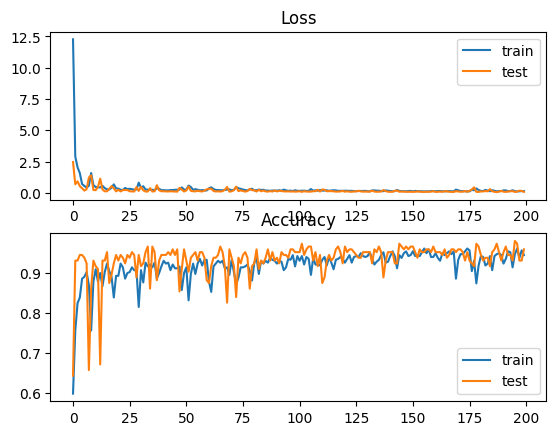

In [48]:
# evaluate the model
_, train_acc = model.evaluate(trainingCols,trainingLabels, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [74]:
# predict crisp classes for test set
#y_pred_ = model.predict(X_test, verbose=0)
##y_pred_ = y_pred_[:, 0]
#accuracy = metrics.accuracy_score(Y_test, y_pred_)
#print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
#precision = metrics.precision_score(Y_test, y_pred_)
#print('Precision: %f' % precision)
# recall: tp / (tp + fn)
#recall = metrics.recall_score(Y_test, y_pred_)
#print('Recall: %f' % recall)
# predict crisp classes for test set
y_pred_ = model.predict(X_test, verbose=0)
y_pred_ = y_pred_[:, 0]
y_pred_ = (y_pred_ > 0.5).astype(int)
accuracy = metrics.accuracy_score(Y_test, y_pred_)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(Y_test, y_pred_)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(Y_test, y_pred_)
print('Recall: %f' % recall)

Accuracy: 0.958042
Precision: 0.980000
Recall: 0.907407


## Build a DNN model with same architecture of above built DNN but with a L2 Regularizer.

- Due to Regularizer, there is a improvement in the performance.
- Loss curve gets more smothen compared to above DNN 1 performance.

In [50]:
# Building a model:
model2 = Sequential([
    Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01) ,input_shape=(30,)),
    Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)),
])
model2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# fit model
history = model2.fit(trainingCols,trainingLabels, validation_data=(X_test, Y_test), epochs=200)




Epoch 1/200
14/14 [==============================] - 5s 53ms/step - loss: 11.9004 - accuracy: 0.5751 - val_loss: 5.2310 - val_accuracy: 0.7972
Epoch 2/200
14/14 [==============================] - 0s 14ms/step - loss: 5.1086 - accuracy: 0.7629 - val_loss: 2.5945 - val_accuracy: 0.9371
Epoch 3/200
14/14 [==============================] - 0s 20ms/step - loss: 3.1602 - accuracy: 0.8474 - val_loss: 2.5163 - val_accuracy: 0.8811
Epoch 4/200
14/14 [==============================] - 0s 29ms/step - loss: 2.5042 - accuracy: 0.8638 - val_loss: 1.8965 - val_accuracy: 0.9231
Epoch 5/200
14/14 [==============================] - 0s 15ms/step - loss: 2.1512 - accuracy: 0.8920 - val_loss: 1.6720 - val_accuracy: 0.9441
Epoch 6/200
14/14 [==============================] - 0s 16ms/step - loss: 2.2358 - accuracy: 0.8474 - val_loss: 1.5178 - val_accuracy: 0.9441
Epoch 7/200
14/14 [==============================] - 0s 10ms/step - loss: 1.7567 - accuracy: 0.9014 - val_loss: 1.4322 - val_accuracy: 0.9441
Epoch

Train: 0.927, Test: 0.965


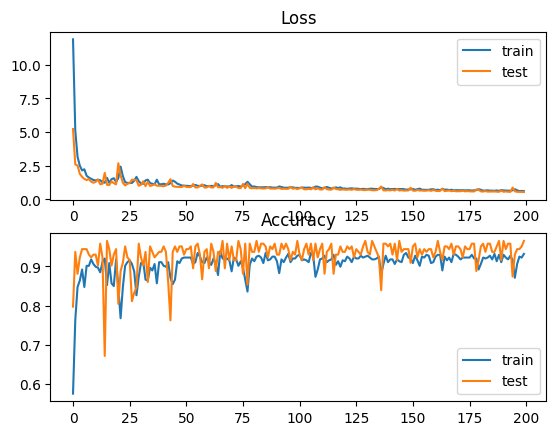

In [51]:
# evaluate the model
_, train_acc = model2.evaluate(trainingCols,trainingLabels, verbose=0)
_, test_acc = model2.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [75]:
# predict crisp classes for test set
y_pred_1 = model2.predict(X_test, verbose=0)
y_pred_1 = y_pred_1[:, 0]
y_pred_1 = (y_pred_1 > 0.5).astype(int)

accuracy = metrics.accuracy_score(Y_test, y_pred_1)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(Y_test, y_pred_1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(Y_test, y_pred_1)
print('Recall: %f' % recall)

Accuracy: 0.965035
Precision: 1.000000
Recall: 0.907407


## Voting Classifier:
   - Ensemble classifier, hard voting and soft voting with top 3 best performed classes from above

  

In [53]:
#import voting classifier
from sklearn.ensemble import VotingClassifier

- ### From above, selecting top 3 performed classifiers to ensemble
   - Random forest (n_estimators = 10, criterion = 'entropy')
   - Logistic Regression
   - KNN

## Hard Voting :

- With Logistic Regression, Random Forest, KNN

In [54]:
# selecting Random Forest, Logistic Regression, KNN or NaiveBayes
log_clf = LogisticRegression(random_state = 0)
knn_5 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
RF_Entr = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
gauss_nb = GaussianNB()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', RF_Entr), ('knn', knn_5), ('NB', gauss_nb)],
    voting='hard')
voting_clf.fit(trainingCols,trainingLabels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10,
                                                     random_state=0)),
                             ('knn', KNeighborsClassifier()),
                             ('NB', GaussianNB())])

In [55]:
y_pred = voting_clf.predict(X_test)
print(" Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print(" Precision:",metrics.precision_score(Y_test, y_pred))
print(" Recall:",metrics.recall_score(Y_test, y_pred))

 Accuracy: 0.972027972027972
 Precision: 1.0
 Recall: 0.9259259259259259


[[89  0]
 [ 4 50]]


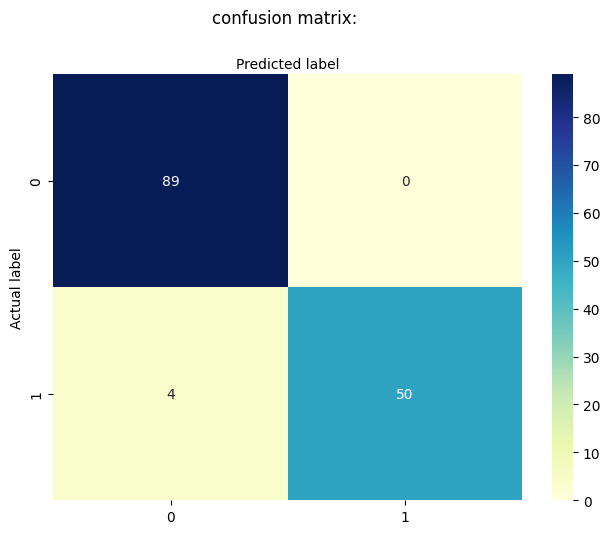

In [56]:
def cnf_only():
    cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

    print(cnf_matrix)
    %matplotlib inline
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('confusion matrix: ', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


cnf_only()

## Soft voting:

- With Logistic Regression, Random Forest, KNN

In [57]:
voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', RF_Entr), ('knn', knn_5)],
    voting='soft')
voting_clf_soft.fit(trainingCols,trainingLabels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10,
                                                     random_state=0)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [58]:
y_pred = voting_clf_soft.predict(X_test)
print(" Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print(" Precision:",metrics.precision_score(Y_test, y_pred))
print(" Recall:",metrics.recall_score(Y_test, y_pred))

 Accuracy: 0.972027972027972
 Precision: 1.0
 Recall: 0.9259259259259259


[[89  0]
 [ 4 50]]


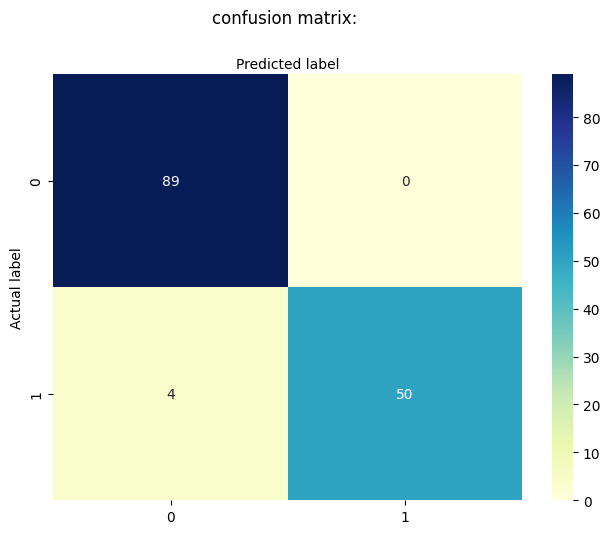

In [59]:
cnf_only()

## ExtraTrees

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree_clf = ExtraTreesClassifier(n_estimators=195, max_leaf_nodes=16, n_jobs=-1, random_state=42)
extra_tree_clf.fit(trainingCols,trainingLabels)
y_pred = extra_tree_clf.predict(X_test)
print(" Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print(" Precision:",metrics.precision_score(Y_test, y_pred))
print(" Recall:",metrics.recall_score(Y_test, y_pred))

 Accuracy: 0.9790209790209791
 Precision: 0.9811320754716981
 Recall: 0.9629629629629629


[[88  1]
 [ 2 52]]


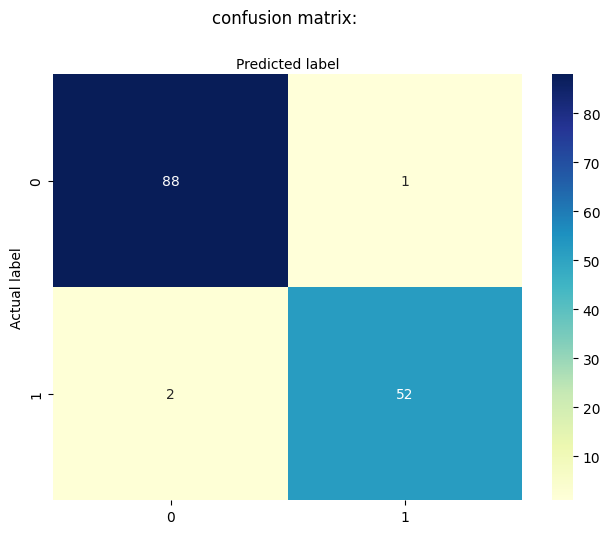

In [61]:
cnf_only()

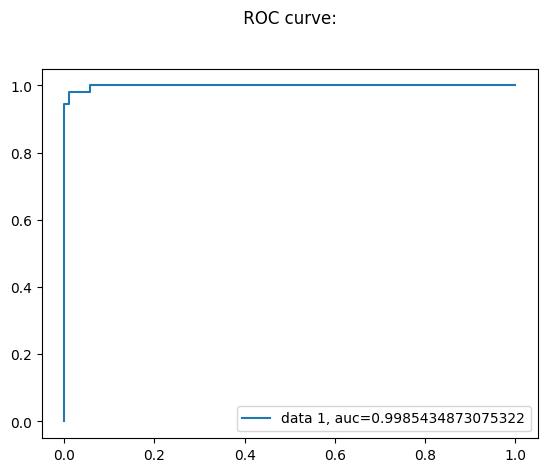

In [62]:
y_pred_proba = extra_tree_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.figure()
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title(' ROC curve: ', y=1.1)
plt.legend(loc=4)
plt.show()

- ### From above, selecting top 3 performed classifiers to ensemble
   - Extra Trees
   - Random forest (n_estimators = 10, criterion = 'entropy')
   - KNN

#### Hard voting Classifier with ExtraTrees, RandomForest, KNN


In [63]:
voting_clf_ET_hard = VotingClassifier(
    estimators=[('ET', extra_tree_clf), ('rf', RF_Entr), ('knn', knn_5)],
    voting='hard')
voting_clf_ET_hard.fit(trainingCols,trainingLabels)

VotingClassifier(estimators=[('ET',
                              ExtraTreesClassifier(max_leaf_nodes=16,
                                                   n_estimators=195, n_jobs=-1,
                                                   random_state=42)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10,
                                                     random_state=0)),
                             ('knn', KNeighborsClassifier())])

In [64]:
y_pred = voting_clf_ET_hard.predict(X_test)
print(" Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print(" Precision:",metrics.precision_score(Y_test, y_pred))
print(" Recall:",metrics.recall_score(Y_test, y_pred))

 Accuracy: 0.972027972027972
 Precision: 0.9807692307692307
 Recall: 0.9444444444444444


[[88  1]
 [ 3 51]]


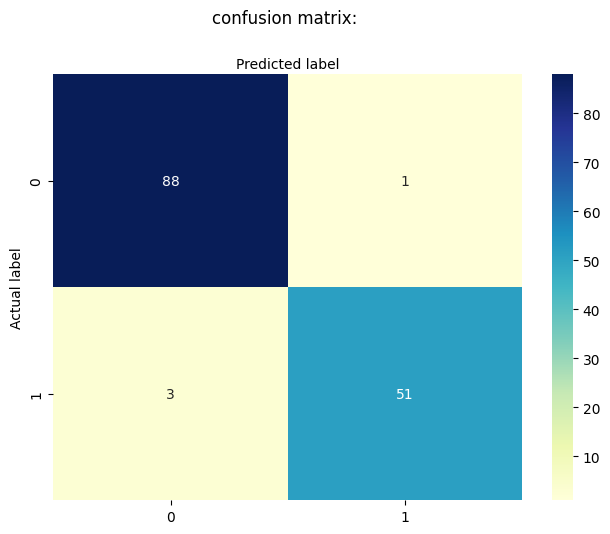

In [65]:
cnf_only()

#### soft voting classifier with ExtraTrees, Random Forest, KNN


In [66]:
voting_clf_ET_soft = VotingClassifier(
    estimators=[('ET', extra_tree_clf), ('rf', RF_Entr), ('knn', knn_5)],
    voting='soft')
voting_clf_ET_soft.fit(trainingCols,trainingLabels)

VotingClassifier(estimators=[('ET',
                              ExtraTreesClassifier(max_leaf_nodes=16,
                                                   n_estimators=195, n_jobs=-1,
                                                   random_state=42)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10,
                                                     random_state=0)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [67]:
y_pred = voting_clf_ET_soft.predict(X_test)
print(" Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print(" Precision:",metrics.precision_score(Y_test, y_pred))
print(" Recall:",metrics.recall_score(Y_test, y_pred))

 Accuracy: 0.9790209790209791
 Precision: 1.0
 Recall: 0.9444444444444444


[[89  0]
 [ 3 51]]


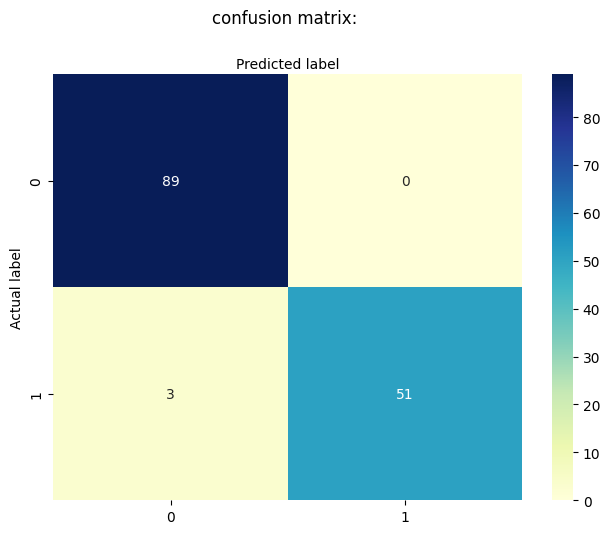

In [68]:
cnf_only()

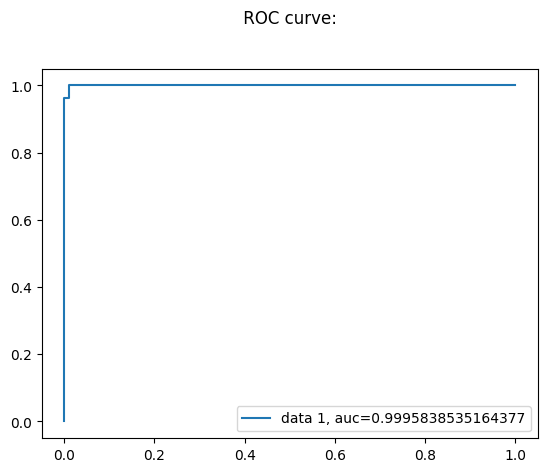

In [69]:
y_pred_proba = voting_clf_ET_soft.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.figure()
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title(' ROC curve: ', y=1.1)
plt.legend(loc=4)
plt.show()

## XGBoost:

XGBoost  Accuracy: 0.958041958041958
XGBoost  Precision: 0.9444444444444444
XGBoost  Recall: 0.9444444444444444
None


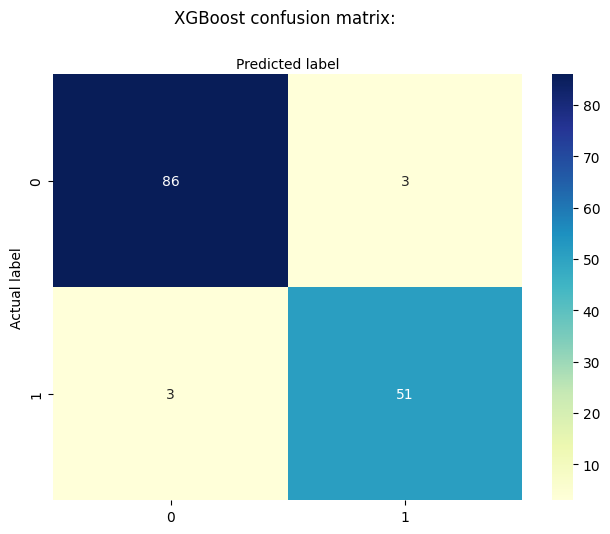

In [70]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()


trained_clf = classify(xgbc, 'XGBoost ')
print(trained_clf)

#pred_prob(xgbc, 'XGBoost ')

#### xgboost with grid search

XGBoost_grid  Accuracy: 0.965034965034965
XGBoost_grid  Precision: 0.9622641509433962
XGBoost_grid  Recall: 0.9444444444444444
None


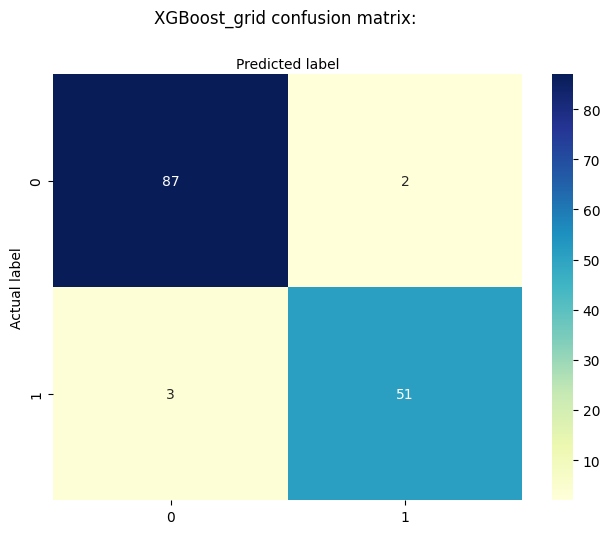

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'learning_rate': [0.1, 0.3],
     'min_child_weight': [0.5, 2], 'gamma': [0, 0.2], 'max_delta_step': [0], 'subsample': [1], 'colsample_bytree': [1], 'colsample_bylevel':[1], 'scale_pos_weight': [1]},]

xgbc_grid = XGBClassifier()
grid_xg = GridSearchCV(xgbc_grid, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

trained_clf = classify(grid_xg, 'XGBoost_grid ')
print(trained_clf)

In [72]:
!pip install libsvm